In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.drop(['User ID'],axis=1,inplace=True)

In [ ]:
data.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

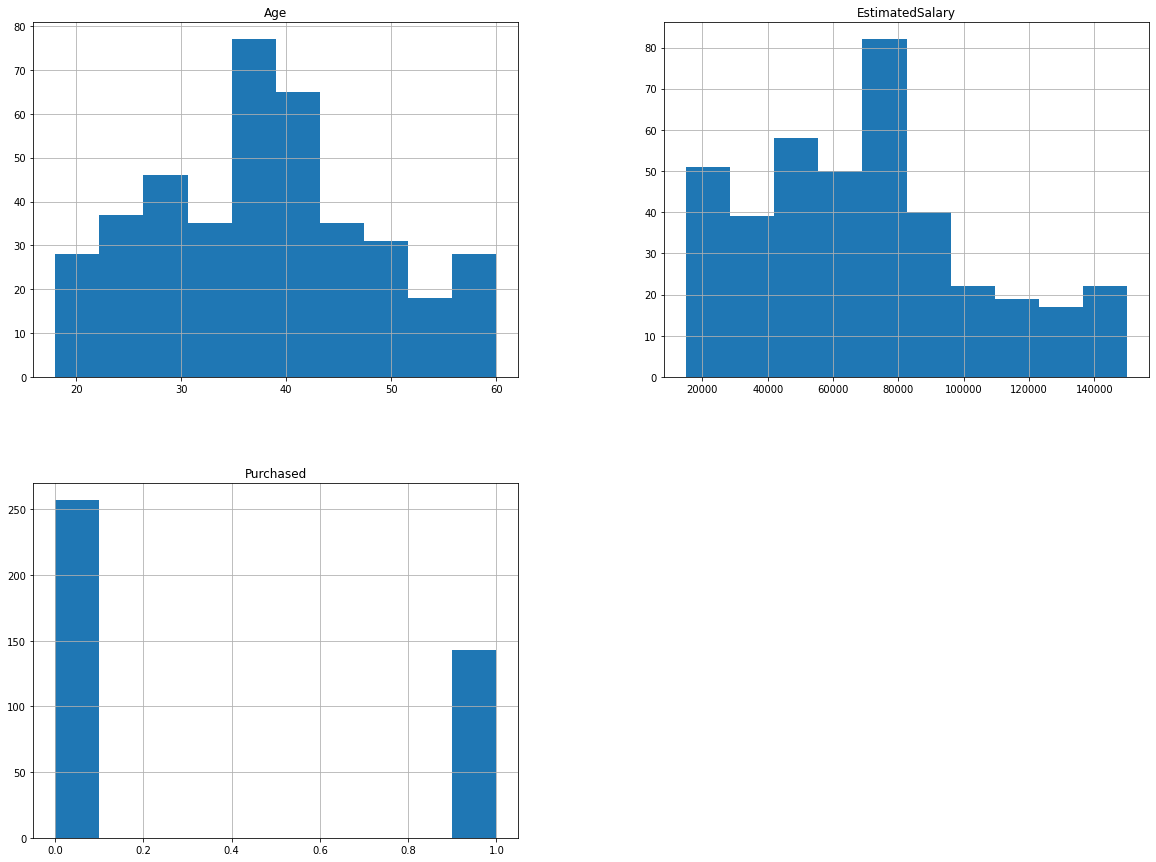

In [ ]:
dgraph=data.select_dtypes(include=['int64'])
dgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
data.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
data.EstimatedSalary.nunique()

117

Text(0.5, 1.0, 'Box plot of Social_Network_Ads')

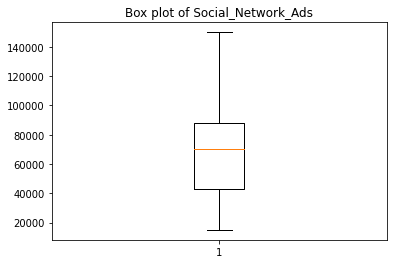

In [ ]:
plt.boxplot(data['EstimatedSalary'])
plt.title('Box plot of Social_Network_Ads')

In [ ]:
data['EstimatedSalary'].median()

70000.0

Text(0.5, 1.0, 'Box plot of Age')

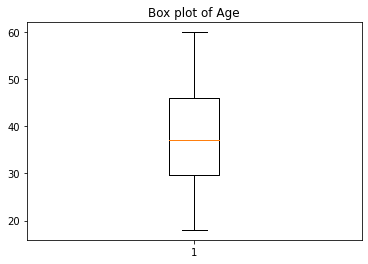

In [ ]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [ ]:
data.Purchased.nunique()

2

In [ ]:
data=pd.get_dummies(data)
data.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


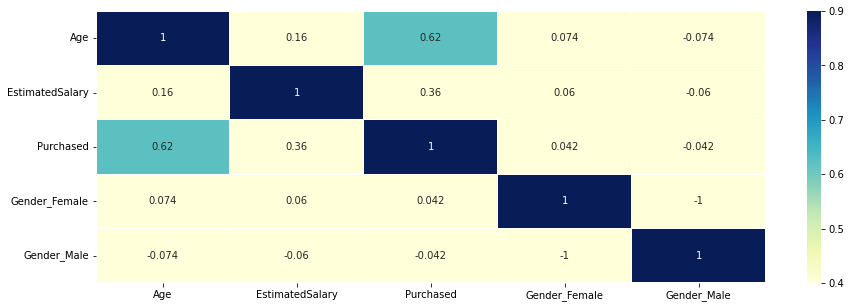

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [ ]:
data.columns
y=data['Purchased']
X=data.drop("Purchased", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSC is:",mean_squared_error(y_test,prediction))

MSC is: 0.09934526998602122


In [ ]:
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,prediction))

R squared value is : 0.5633174945669397
